In [9]:
!pip install easyocr
reader = easyocr.Reader(['en'], gpu=False)


in this notebook i will apply some methodologies and techniques to reduce the cpu uses ans make it more optimised

In [10]:
import torch
import psutil
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [11]:
if torch.cuda.is_available():
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory Allocated: {torch.cuda.memory_allocated(0)/1024**3:.2f} GB")
    print(f"Memory Cached: {torch.cuda.memory_reserved(0)/1024**3:.2f} GB")
else:
    print("GPU not available, using CPU.")

GPU not available, using CPU.


In [28]:
# Import necessary libraries
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np




In [23]:
# Step 1: Load the image and resize it to reduce CPU usage
IMAGE_PATH = '/content/sample_data/sign.png'
img = cv2.imread(IMAGE_PATH)

In [24]:

# Resizing reduces the number of pixels that need to be processed.
img = cv2.resize(img, (800, 600))  # Adjust width and height to reduce size


In [25]:
# Grayscale conversion reduces the complexity by using a single color channel instead of three (RGB).
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Change 3: Ensure the reader runs on the CPU by setting `gpu=False`
reader = easyocr.Reader(['en'], gpu=False)


In [26]:
# This step is simplified because the image is smaller and in grayscale, reducing CPU load.
result = reader.readtext(img_gray)


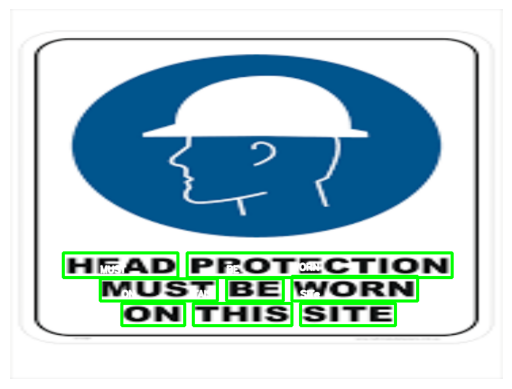

In [27]:
# Step 4: Draw bounding boxes and text on the original (resized) image
for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]

    # Draw the bounding box
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)

    # Add the recognized text near the bounding box
    img = cv2.putText(img, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)

# Step 5: Display the final image with detections
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes for better visualization
plt.show()


In [20]:
cpu_usage = psutil.cpu_percent(interval=1)
print(f"CPU Usage: {cpu_usage}%")

CPU Usage: 3.5%


In [22]:
# Memory usage
memory_info = psutil.virtual_memory()
print(f"Memory Usage: {memory_info.percent}%")

Memory Usage: 19.5%
